In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import cv2

## View the content of dataset files

In [34]:
file_path = './h5datafiles/file1000001.h5'

with h5py.File(file_path, 'r') as file:
    print("Root keys:", list(file.keys()), end="\n\n")

    for item in file.keys():
        
        print("Name: ",item)
        dataset = file[item]
        
        print("Dataset shape:", dataset.shape)
        print("Dataset data type:", dataset.dtype)
        print(type(dataset))
        print()

Root keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']

Name:  ismrmrd_header
Dataset shape: ()
Dataset data type: object
<class 'h5py._hl.dataset.Dataset'>

Name:  kspace
Dataset shape: (36, 640, 368)
Dataset data type: complex64
<class 'h5py._hl.dataset.Dataset'>

Name:  reconstruction_esc
Dataset shape: (36, 320, 320)
Dataset data type: float32
<class 'h5py._hl.dataset.Dataset'>

Name:  reconstruction_rss
Dataset shape: (36, 320, 320)
Dataset data type: float32
<class 'h5py._hl.dataset.Dataset'>



Root keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']
Dataset shape: (36, 320, 320)
Dataset data type: float32
<class 'h5py._hl.dataset.Dataset'>


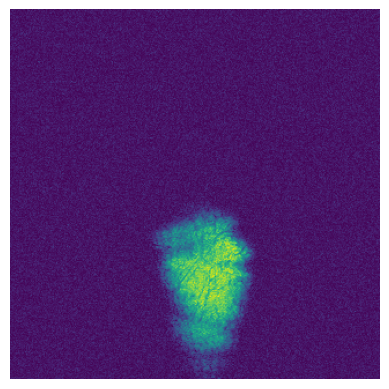

In [32]:
with h5py.File(file_path, 'r') as file:
    
    print("Root keys:", list(file.keys()))
    dataset = file['reconstruction_esc']

    print("Dataset shape:", dataset.shape)
    print("Dataset data type:", dataset.dtype)
    print(type(dataset))

    values = dataset[()]

    plt.imshow(values[1])
    plt.axis('off')
    plt.show()

## Collect dataset

In [50]:
def get_last_saved_index(image_dir):
    files = sorted(os.listdir(image_dir))
    if files:
        last_file = files[-1]
        last_index = int(last_file.split('_')[1].split('.')[0])
    else:
        last_index = -1
    return last_index

# auto
folder_name = "./h5datafiles"
if not os.path.exists(folder_name):
    print(f"The folder '{folder_name}' does not exist.")
else:
    all_files = os.listdir(folder_name)
    print(all_files)
    file_paths = [filename for filename in all_files if filename.endswith('.h5')]

#manual
# file_paths = ['file1000005.h5', 'file1000021.h5', 'file1000023.h5', 'file1000027.h5', 'file1000029.h5', 'file1000032.h5', 'file1000039.h5', 'file1000040.h5', 'file1000043.h5', 'file1000045.h5', 'file1000048.h5']

extracted_images_dir = 'dataset'
os.makedirs(extracted_images_dir, exist_ok=True)

for file_path in file_paths:
    file_path = os.path.join("./h5datafiles", file_path)
    with h5py.File(file_path, 'r') as file:
        for dataset_name in ['reconstruction_esc', 'reconstruction_rss']:
            dataset = file[dataset_name]
            
            images_dir = os.path.join(extracted_images_dir, dataset_name)
            os.makedirs(images_dir, exist_ok=True)
            
            last_index = get_last_saved_index(images_dir)
            
            for i in range(dataset.shape[0]):
                image_slice = dataset[i]
                
                plt.imshow(image_slice)
                plt.axis('off')
                
                new_index = last_index + 1 + i
                plt.savefig(os.path.join(images_dir, f'slice_{new_index:04d}.png'), bbox_inches='tight', pad_inches=0)
                plt.close()

['file1000508.h5', 'file1000518.h5', 'file1000458.h5', 'file1000015.h5', 'file1000539.h5', 'file1000479.h5', 'file1000529.h5', 'file1000509.h5', 'file1000459.h5', 'file1000010.h5', 'file1000495.h5', 'file1000452.h5', 'file1000472.h5', 'file1000481.h5', 'file1000547.h5', 'file1000517.h5', 'file1000490.h5', 'file1000467.h5', 'file1000483.h5', 'file1000504.h5', 'file1000514.h5', 'file1000493.h5', 'file1000510.h5', 'file1000501.h5', 'file1000486.h5', 'file1000535.h5', 'file1000475.h5', 'file1000540.h5', 'file1000511.h5', 'file1000482.h5', 'file1000012.h5']
